In [1]:
from loader import prepare_loaders
from preprocess import final_csv_path

train_loader, valid_loader = prepare_loaders(final_csv_path)

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from utility import fetch_scheduler
from model import CustomEfficientNetV2
from config import CONFIG

import torch.optim as optim
print(CONFIG['model_name'])
model = CustomEfficientNetV2(CONFIG['model_name'])
model.to(CONFIG['device'])
optimizer = optim.Adam(model.parameters(), lr=CONFIG['learning_rate'])
scheduler = fetch_scheduler(optimizer)

efficientnet_v2_m


In [3]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print(next(iter(train_loader)))

{'image': tensor([[[[ 0.6392,  0.6049,  0.5878,  ...,  1.0331,  0.9988,  0.9988],
          [ 0.6563,  0.6221,  0.5707,  ...,  0.9646,  0.9817,  0.9988],
          [ 0.6734,  0.6221,  0.5707,  ...,  0.9817,  0.9988,  1.0159],
          ...,
          [ 1.1872,  1.2043,  1.1700,  ...,  1.1700,  1.1529,  1.1358],
          [ 1.2043,  1.1872,  1.1529,  ...,  1.1700,  1.1529,  1.1529],
          [ 1.1872,  1.1529,  1.1187,  ...,  1.1872,  1.1700,  1.1700]],

         [[-0.2150, -0.2325, -0.2675,  ...,  0.4153,  0.3803,  0.3803],
          [-0.1800, -0.2150, -0.2675,  ...,  0.3452,  0.3627,  0.3803],
          [-0.1625, -0.2150, -0.2675,  ...,  0.3627,  0.3627,  0.3803],
          ...,
          [ 0.4328,  0.4678,  0.4503,  ...,  0.6429,  0.6254,  0.6078],
          [ 0.4328,  0.4328,  0.4153,  ...,  0.6429,  0.6429,  0.6254],
          [ 0.4153,  0.3978,  0.3803,  ...,  0.6429,  0.6604,  0.6429]],

         [[-0.4624, -0.4798, -0.5147,  ...,  0.1651,  0.1302,  0.1302],
          [-0.4275, 

In [4]:
from trainer import trainer
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    model, history = trainer(train_loader, valid_loader, model, optimizer, scheduler, num_epochs=CONFIG['n_epochs'], device=CONFIG['device'])

[INFO] Using GPU: NVIDIA L40S



100%|██████████| 36/36 [00:06<00:00,  5.45it/s, Epoch=1, Valid_Loss=32]  


Validation AUROC Improved (-inf ---> 0.15253628729479676)
Model Saved!



100%|██████████| 36/36 [00:06<00:00,  5.77it/s, Epoch=2, Valid_Loss=15.7]


Validation AUROC Improved (0.15253628729479676 ---> 0.16377015865142835)
Model Saved!



100%|██████████| 36/36 [00:06<00:00,  5.61it/s, Epoch=3, Valid_Loss=17.4]


Validation AUROC Improved (0.16377015865142835 ---> 0.18071355253821614)
Model Saved!



100%|██████████| 36/36 [00:06<00:00,  5.76it/s, Epoch=4, Valid_Loss=30.7]


100%|██████████| 36/36 [00:06<00:00,  5.61it/s, Epoch=5, Valid_Loss=12.1]


Validation AUROC Improved (0.18071355253821614 ---> 0.18582263831194323)
Model Saved!



100%|██████████| 36/36 [00:06<00:00,  5.79it/s, Epoch=6, Valid_Loss=10.3]


Validation AUROC Improved (0.18582263831194323 ---> 0.1900973401946804)
Model Saved!



100%|██████████| 36/36 [00:06<00:00,  5.68it/s, Epoch=7, Valid_Loss=17.8]


100%|██████████| 36/36 [00:06<00:00,  5.75it/s, Epoch=8, Valid_Loss=8.73]


100%|██████████| 36/36 [00:06<00:00,  5.60it/s, Epoch=9, Valid_Loss=8.43]


Validation AUROC Improved (0.1900973401946804 ---> 0.19148586741617923)
Model Saved!



100%|██████████| 36/36 [00:06<00:00,  5.75it/s, Epoch=10, Valid_Loss=8.47]


Validation AUROC Improved (0.19148586741617923 ---> 0.1922563222904223)
Model Saved!



100%|██████████| 36/36 [00:06<00:00,  5.66it/s, Epoch=11, Valid_Loss=11.9]


Validation AUROC Improved (0.1922563222904223 ---> 0.1951898926020074)
Model Saved!



100%|██████████| 36/36 [00:06<00:00,  5.76it/s, Epoch=12, Valid_Loss=11.6]


100%|██████████| 36/36 [00:06<00:00,  5.63it/s, Epoch=13, Valid_Loss=12.4]


100%|██████████| 36/36 [00:06<00:00,  5.68it/s, Epoch=14, Valid_Loss=9.42]


100%|██████████| 36/36 [00:06<00:00,  5.64it/s, Epoch=15, Valid_Loss=14.2]


 32%|███▏      | 91/286 [00:26<00:56,  3.46it/s, Epoch=16, LR=0.00473, Train_Loss=0.633]IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



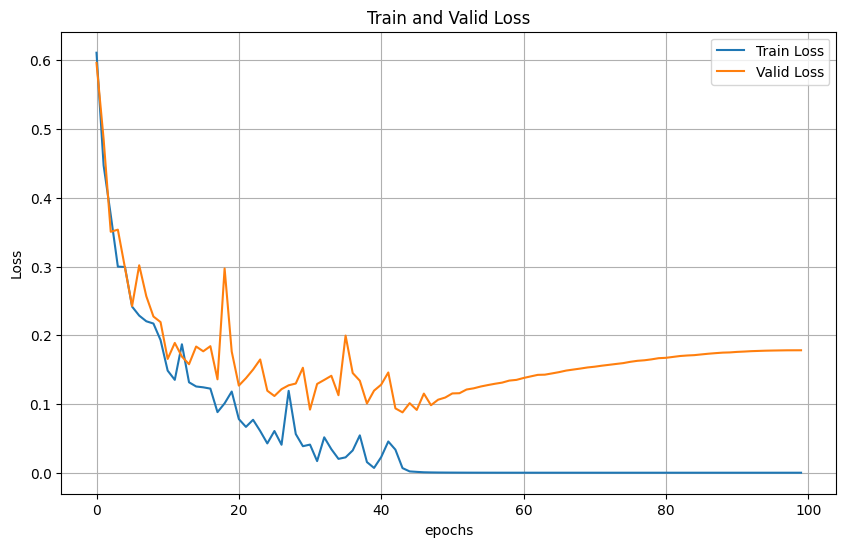

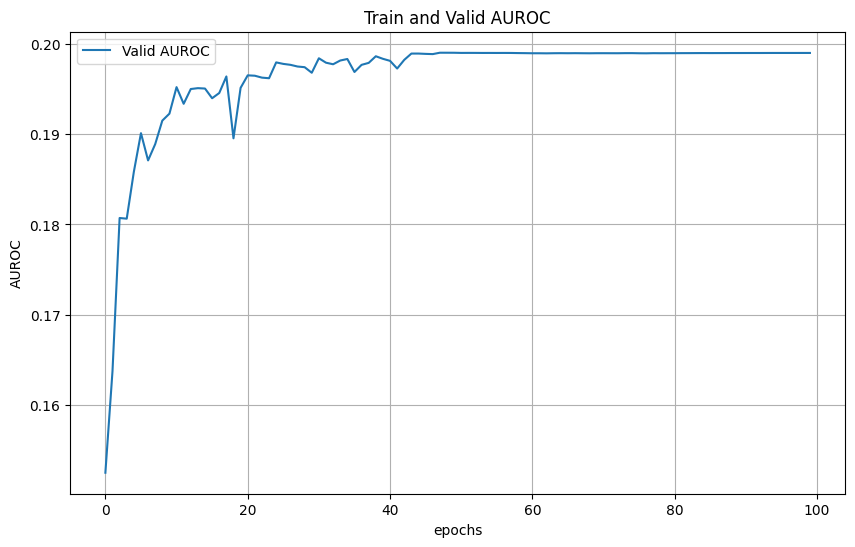

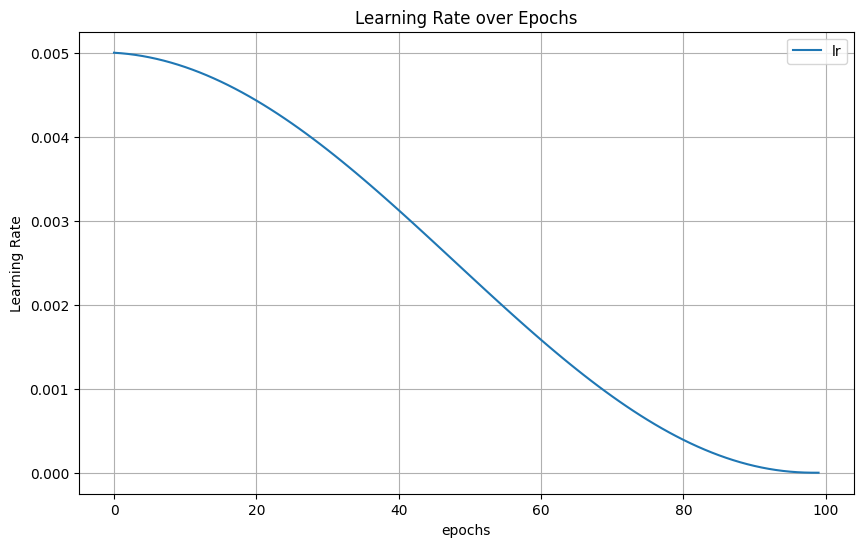

In [8]:
from utility import plot_history
import pandas as pd
history = pd.DataFrame.from_dict(history)
history.to_csv("history.csv", index=False)
plot_history(history, y_label="Loss", title="Train and Valid Loss", keys=["Train Loss", "Valid Loss"])
plot_history(history, y_label="AUROC", title="Train and Valid AUROC", keys=["Valid AUROC"])
plot_history(history, y_label="Learning Rate", title="Learning Rate over Epochs", keys=["lr"])

In [12]:
from torch.utils.data import DataLoader

from loader import MelanomaDataset, custom_collate_fn
from trainer import valid_one_epoch
from config import TRANSFORM
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    all_data = MelanomaDataset(transform=TRANSFORM['valid'])
    all_data_loader = DataLoader(all_data, batch_size=CONFIG['valid_batch_size'], num_workers=CONFIG['n_workers'], shuffle=False, pin_memory=True, collate_fn=custom_collate_fn)
    loss, auroc = valid_one_epoch(model=model, dataloader=all_data_loader, device=CONFIG['device'], epoch=CONFIG['n_epochs'])
    print(f'For All data, LOSS is {loss} and AUROC is {auroc}')

100%|██████████| 179/179 [00:29<00:00,  5.98it/s, Epoch=100, Valid_Loss=0.00115] 

For All data, LOSS is 0.019917236971126736 and AUROC is 0.19982226631119926
